In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_temp= session.query(Measurement.date, Measurement.tobs ).filter(extract('month', Measurement.date) == 6).all()


In [5]:
#  3. Convert the June temperatures to a list.
print(type(june_temp))


<class 'list'>


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df= pd.DataFrame(june_temp, columns=['date','June temperature'])
june_df

,date,June temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_temp = session.query(Measurement.date, Measurement.tobs ).filter(extract('month', Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.
print(dec_temp)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp, columns=['date', 'Dec temperature'])
dec_df

,date,Dec temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
frames = [june_df,dec_df]
result = pd.concat(frames)
result.describe().round(decimals = 2)

,June temperature,Dec temperature
count,1700.00,1517.00
mean,74.94,71.04
std,3.26,3.75
min,64.00,56.00
25%,73.00,69.00
50%,75.00,71.00
75%,77.00,74.00
max,85.00,83.00


<AxesSubplot:ylabel='Frequency'>

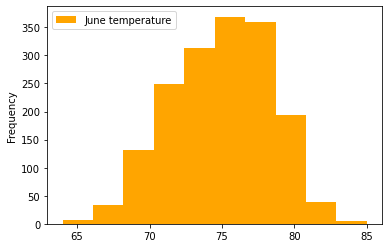

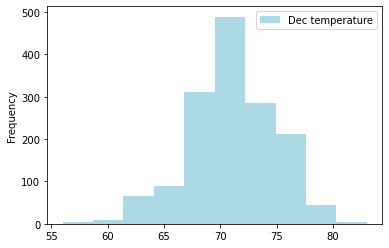

In [32]:
june_df.plot.hist(bins=10, color="orange")
dec_df.plot.hist(bins=10, color="lightblue")


In [49]:
june_temp= session.query(Measurement.date, Measurement.tobs,Measurement.prcp ).filter(extract('month', Measurement.date) == 6).all()

#New June dataframe
new_june_df = pd.DataFrame(june_temp, columns = ["Date", "June Temp", "June Precipitation"])

#New June data summary statistics
new_june_df.describe()

,June Temp,June Precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [50]:
dec_temp= session.query(Measurement.date, Measurement.tobs,Measurement.prcp ).filter(extract('month', Measurement.date) == 12).all()

#New June dataframe
new_dec_df = pd.DataFrame(dec_temp, columns = ["Date", "Dec Temp", "Dec Precipitation"])
new_dec_df.describe()

,Dec Temp,Dec Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [51]:
new_frame = [new_june_df, new_dec_df]
new_summary= pd.concat(new_frame)
new_summary.describe().round(decimals = 2)

,June Temp,June Precipitation,Dec Temp,Dec Precipitation
count,1700.00,1574.00,1517.00,1405.00
mean,74.94,0.14,71.04,0.22
std,3.26,0.34,3.75,0.54
min,64.00,0.00,56.00,0.00
25%,73.00,0.00,69.00,0.00
50%,75.00,0.02,71.00,0.03
75%,77.00,0.12,74.00,0.15
max,85.00,4.43,83.00,6.42
